In [326]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plot 
from pandas import Series, DataFrame

%matplotlib inline

In [327]:
#csvファイルの読み込み
train = pd.read_csv('house_train.csv')
test = pd.read_csv('house_test.csv')

In [328]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [329]:
#iloc で列番号を指定して抽出できる
all_data = pd.concat((train.iloc[:,1:-1], test.iloc[:,1:-1]))

In [330]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706,0,...,WD,0,Pave,8,856,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978,0,...,WD,0,Pave,6,1262,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486,0,...,WD,0,Pave,6,920,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216,0,...,WD,0,Pave,7,756,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655,0,...,WD,0,Pave,9,1145,AllPub,192,2000,2000,2008


In [331]:
all_data.dtypes

1stFlrSF           int64
2ndFlrSF           int64
3SsnPorch          int64
Alley             object
BedroomAbvGr       int64
BldgType          object
BsmtCond          object
BsmtExposure      object
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtFinType1      object
BsmtFinType2      object
BsmtFullBath     float64
BsmtHalfBath     float64
BsmtQual          object
BsmtUnfSF        float64
CentralAir        object
Condition1        object
Condition2        object
Electrical        object
EnclosedPorch      int64
ExterCond         object
ExterQual         object
Exterior1st       object
Exterior2nd       object
Fence             object
FireplaceQu       object
Fireplaces         int64
Foundation        object
FullBath           int64
                  ...   
LotFrontage      float64
LotShape          object
LowQualFinSF       int64
MSSubClass         int64
MSZoning          object
MasVnrArea       float64
MasVnrType        object
MiscFeature       object
MiscVal            int64


# LassoModelでの回帰を試す

### Lasso/LassoCVでテスト

In [332]:
#lasso modelの読み込み
from sklearn import linear_model
clf = linear_model.Lasso(alpha = 0.1)

In [333]:
#house price 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [334]:
#numeric 型のみのデータフレームを取得
train = train.fillna(train.mean())
train_sets = train.loc[:, train.dtypes != 'object']
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [335]:
#house price 取得
train_sales = np.log1p(train_sets['SalePrice'])
train_sets.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65,8450,7,5,2003,2003,196,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80,9600,6,8,1976,1976,0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68,11250,7,5,2001,2002,162,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60,9550,7,5,1915,1970,0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84,14260,8,5,2000,2000,350,655,...,192,84,0,0,0,0,0,12,2008,250000


In [336]:
train_sets = train_sets.iloc[:,1:-1]

In [337]:
#lasso の適用
#alpha = default 1.0
clf.fit(train_sets, train_sales)
train_sales.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [338]:
#係数の確認
clf.coef_

array([ -5.60478029e-04,  -0.00000000e+00,   1.83126890e-06,
         0.00000000e+00,   0.00000000e+00,   3.37353498e-03,
         3.50358878e-03,   4.34561088e-05,   5.84306483e-05,
         2.41277431e-05,  -0.00000000e+00,   1.12841277e-04,
         8.00929812e-05,   1.05709652e-04,  -0.00000000e+00,
         2.29174280e-04,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -2.82088911e-04,   0.00000000e+00,   2.96686583e-04,
         1.90406169e-04,   3.05453883e-05,   1.83878446e-04,
         1.66453353e-04,   5.30380024e-04,  -4.53456518e-04,
        -4.07050915e-06,   0.00000000e+00,  -0.00000000e+00])

In [339]:
##Lasso cvで交差検証してみる
#first, import LassoCV model
from sklearn.linear_model import Lasso, LassoCV, RidgeCV

In [340]:
#cv で回数指定しないと動かないので注意
model = LassoCV(cv = 10).fit(train_sets, train_sales)
train_sets.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65,8450,7,5,2003,2003,196,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80,9600,6,8,1976,1976,0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68,11250,7,5,2001,2002,162,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60,9550,7,5,1915,1970,0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84,14260,8,5,2000,2000,350,655,0,...,836,192,84,0,0,0,0,0,12,2008


In [341]:
#modelのmse path を出力
model.mse_path_

array([[ 0.14304332,  0.15630501,  0.18018288,  0.18129443,  0.20644308,
         0.12928228,  0.15161676,  0.13985261,  0.14380682,  0.16208496],
       [ 0.14203683,  0.15538695,  0.18018288,  0.1799897 ,  0.20575554,
         0.12826123,  0.15097646,  0.13918895,  0.14279766,  0.16116386],
       [ 0.1411148 ,  0.15362447,  0.18017452,  0.17874144,  0.20397342,
         0.12733427,  0.15039318,  0.13858269,  0.14189553,  0.16033057],
       [ 0.14026937,  0.15213952,  0.17602478,  0.1776193 ,  0.20238907,
         0.12649176,  0.14986127,  0.1380283 ,  0.14108812,  0.15957584],
       [ 0.13949351,  0.15089272,  0.1731157 ,  0.1766093 ,  0.20097905,
         0.12572514,  0.14937571,  0.13752086,  0.14036464,  0.15889146],
       [ 0.13878087,  0.14985003,  0.17123849,  0.17569914,  0.19972281,
         0.12502682,  0.148932  ,  0.13705595,  0.13971558,  0.15827013],
       [ 0.13812577,  0.14898207,  0.17021474,  0.17487795,  0.19860232,
         0.12439002,  0.14852614,  0.13662962

In [342]:
#alphaのlog変換
alphas = -np.log10(model.alphas_)
#al = pd.Series(model.alphas_)
#al

(-0.05, 0)

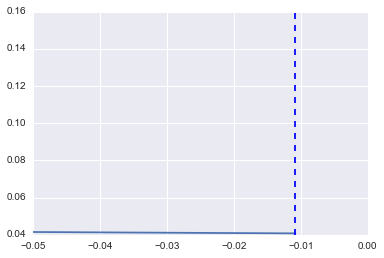

In [343]:
#example 
#plot.plot(alphas, model.mse_path_, ':')

#alphaごとにmse_pathの平均を取る
plot.plot(alphas, model.mse_path_.mean(axis = -1))
plot.axvline(-np.log10(model.alpha_ ),linestyle = '--')
plot.xlim(-0.05, 0 )

In [344]:
#mseが最小となるalphaを取得
-np.log10(model.alpha_)
model.alpha_

1.0252347246350562

In [345]:
#最もmseの低いalphaでLasso Modelを定義
test_model = linear_model.Lasso(alpha = 1.0252347246350562 )

In [346]:
test_model.fit(train_sets, train_sales)

Lasso(alpha=1.0252347246350562, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [347]:
test = pd.read_csv('house_test.csv')
test = test.loc[:, test.dtypes != 'object']
test = test.fillna(test.mean())
test = test.iloc[:, 1:]

In [348]:
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80,11622,5,6,1961,1961,0,468,144,...,730,140,0,0,0,120,0,0,6,2010
1,20,81,14267,6,6,1958,1958,108,923,0,...,312,393,36,0,0,0,0,12500,6,2010
2,60,74,13830,5,5,1997,1998,0,791,0,...,482,212,34,0,0,0,0,0,3,2010
3,60,78,9978,6,6,1998,1998,20,602,0,...,470,360,36,0,0,0,0,0,6,2010
4,120,43,5005,8,5,1992,1992,0,263,0,...,506,0,82,0,0,144,0,0,1,2010


In [349]:
test_model.predict(test)

array([ 11.86081627,  11.94991626,  12.1634932 , ...,  12.08548287,
        11.69030247,  12.33667931])

In [350]:
preds = pd.DataFrame({"preds":test_model.predict(train_sets), "true_value":train_sales})

In [351]:
preds["residuals"] = preds["preds"] - preds["true_value"]

/Users/yoichi.yamakawa/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


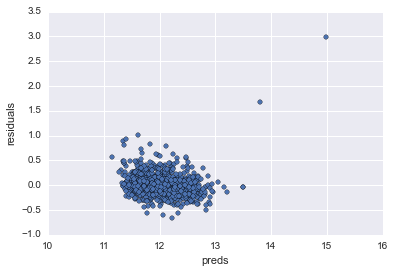

In [352]:
preds.plot(x = "preds", y ="residuals", kind = "scatter")

In [353]:
pred1 = np.expm1(test_model.predict(test))
test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80,11622,5,6,1961,1961,0,468,144,...,730,140,0,0,0,120,0,0,6,2010
1,20,81,14267,6,6,1958,1958,108,923,0,...,312,393,36,0,0,0,0,12500,6,2010
2,60,74,13830,5,5,1997,1998,0,791,0,...,482,212,34,0,0,0,0,0,3,2010
3,60,78,9978,6,6,1998,1998,20,602,0,...,470,360,36,0,0,0,0,0,6,2010
4,120,43,5005,8,5,1992,1992,0,263,0,...,506,0,82,0,0,144,0,0,1,2010


In [354]:
org_data = pd.read_csv('house_test.csv')
tests = pd.DataFrame({"Id":org_data.Id, "SalePrice":pred1})

#Ridge Modelを試してみる

### Ridge/RidgeCVを適用

In [404]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import cross_val_score

In [405]:
test.head()
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [406]:
train_sets.head()
train_sales.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [407]:
#Ridgeでもmse計算したいが、lassoのようにあるわけではないので、自分で定義する
#でも結局RidgeCVで導ける
def mse_cv(model):
    mse = -cross_val_score(model, train_sets, train_sales, scoring="neg_mean_squared_error", cv= 10)
    return mse

In [408]:
test_alphas = [0.0001, 0.001, 0.01, 0.5, 1,1.02, 5 , 10 ,30, 50, 100, 1000]

In [409]:
cv_ridge = [mse_cv(Ridge(alpha= test_alpha)).mean()
                        for test_alpha in test_alphas]

In [410]:
cv_ridge = pd.Series(cv_ridge, index = test_alphas)

(4, 6)

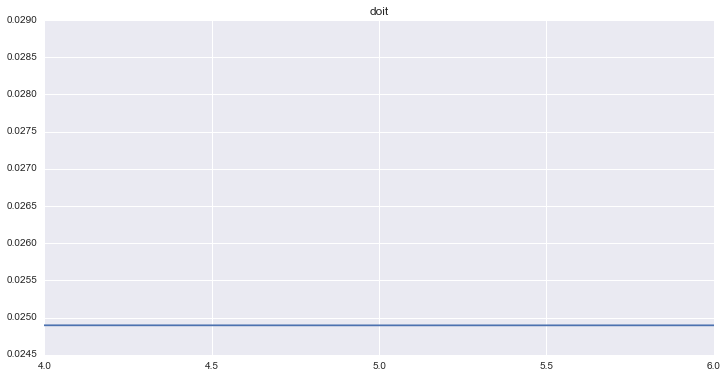

In [411]:
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
cv_ridge.plot(title = 'doit')
plot.xlabel = ("test alphas")
plot.ylabel = ("mse")
plot.xlim(4, 6)


In [412]:
cv_ridge.min()

0.024895758201427837

In [413]:
#最適なalpha = 5となった
best_ridge = RidgeCV(cv = 10, alphas = test_alphas).fit(train_sets, train_sales)
best_ridge.alpha_

5

In [416]:
best_ridge = Ridge(alpha=5).fit(train_sets, train_sales)

In [426]:
ridge_pred1 =  np.expm1(best_ridge.predict(test))

In [427]:
ridge_pred1

array([ 118665.39424091,  138542.86282595,  167655.47092498, ...,
        178708.38826253,  113873.61992613,  239894.16332385])

In [428]:
ridge_predict = pd.DataFrame({"Id":org_data.Id, "SalePrice":ridge_pred1})

In [429]:
ridge_predict.to_csv("ridge1_csv", index=False)

In [430]:
ridge_predict


,Id,SalePrice
0,1461,118665.394241
1,1462,138542.862826
2,1463,167655.470925
3,1464,195373.070145
4,1465,181713.720669
5,1466,174240.765334
6,1467,197877.079731
7,1468,168371.166458
8,1469,193362.907095
9,1470,115577.762707


In [425]:
tests

,Id,SalePrice
0,1461,141606.760742
1,1462,154803.182689
2,1463,191661.865979
3,1464,191408.118644
4,1465,168145.971932
5,1466,173971.742214
6,1467,173890.036706
7,1468,159395.937468
8,1469,177344.248367
9,1470,136303.359473
